In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
cdata_mex_pairs=pd.read_csv('../output_data/complexity_data_mex_pairs_all.csv')

#RCA weighted metrics
cdata_mex_pairs['GPDperCAP_rca1']=cdata_mex_pairs['GPDperCAP']*cdata_mex_pairs['rca1']
cdata_mex_pairs['discovery_factor_rca1']=cdata_mex_pairs['discovery_factor']*cdata_mex_pairs['rca1']
cdata_mex_pairs['degree_centrality_rca1']=cdata_mex_pairs['degree_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['eigenvecor_centrality_rca1']=cdata_mex_pairs['eigenvecor_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['closeness_centrality_rca1']=cdata_mex_pairs['closeness_centrality']*cdata_mex_pairs['rca1']


cdata_mex_pairs_under_trans=cdata_mex_pairs.loc[cdata_mex_pairs['M_num'].isin([0,1])]
cdata_mex_pairs_under_trans

,Unnamed: 0.1,Unnamed: 0,year_pair,location_code,Product,export,eci,pci,density,coi,...,ied,discovery_factor,degree_centrality,eigenvecor_centrality,closeness_centrality,GPDperCAP_rca1,discovery_factor_rca1,degree_centrality_rca1,eigenvecor_centrality_rca1,closeness_centrality_rca1
0,0,0,2004_2009,Centro,112511,3714.0,1.332416,-0.095911,0.332567,-1.683670,...,0.0,0.0,0.793103,0.037885,0.828571,0.000000,0.0,0.000000,0.000000,0.000000
2,2,2,2004_2009,Centro,114111,3714.0,1.332416,-1.755006,0.250600,-1.683670,...,0.0,0.0,0.602854,0.027091,0.715745,0.000000,0.0,0.000000,0.000000,0.000000
3,3,3,2004_2009,Centro,114112,3714.0,1.332416,-1.061710,0.319716,-1.683670,...,0.0,0.0,0.858502,0.039375,0.876042,0.000000,0.0,0.000000,0.000000,0.000000
4,4,4,2004_2009,Centro,114113,3714.0,1.332416,-1.334214,0.325510,-1.683670,...,0.0,0.0,0.743163,0.034190,0.795648,0.000000,0.0,0.000000,0.000000,0.000000
5,5,5,2004_2009,Centro,114119,3714.0,1.332416,-2.993308,0.156146,-1.683670,...,0.0,0.0,0.223543,0.008535,0.562918,0.004891,0.0,0.007465,0.000285,0.018799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13608,13608,13608,2004_2019,Sur,623221,3714.0,-1.455974,-0.095911,0.167816,0.562669,...,0.0,0.0,0.793103,0.037885,0.828571,0.063642,0.0,0.391041,0.018679,0.408529
13617,13617,13617,2004_2019,Sur,624231,3714.0,-1.455974,-0.516704,0.202593,0.562669,...,0.0,0.0,0.498216,0.023795,0.665875,0.060990,0.0,0.235411,0.011243,0.314631
13624,13624,13624,2004_2019,Sur,711211,3714.0,-1.455974,0.712639,0.159175,0.562669,...,0.0,0.0,0.963139,0.043085,0.964450,0.062024,0.0,0.462805,0.020703,0.463434
13626,13626,13626,2004_2019,Sur,711311,3714.0,-1.455974,-0.095911,0.167816,0.562669,...,0.0,0.0,0.793103,0.037885,0.828571,0.054516,0.0,0.334970,0.016001,0.349950


In [6]:
cdata_mex_pairs['discovery_factor'].isna().any()

False

In [8]:
low_range_array=[0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]

for low_range in low_range_array:

    cdata_mex_pairs['M_num_relaxed_'+str(low_range).replace('.','_')] = cdata_mex_pairs.apply(lambda row: 1 if row['rca1'] < low_range and row['rca2'] > 1 else (0 if row['rca1'] < low_range and row['rca2'] < low_range else None), axis=1)

low_range=0.85   

cdata_mex_pairs[['M_num_relaxed_'+str(low_range).replace('.','_'),'rca1','rca2']].loc[cdata_mex_pairs['M_num_relaxed_'+str(low_range).replace('.','_')]==1]

,M_num_relaxed_0_85,rca1,rca2
35,1.0,0.699321,1.060136
47,1.0,0.815874,1.374250
76,1.0,0.673096,1.265589
108,1.0,0.424702,1.124387
155,1.0,0.767835,1.383163
...,...,...,...
13531,1.0,0.845930,1.068907
13600,1.0,0.385721,1.199421
13602,1.0,0.848092,1.399633
13671,1.0,0.783147,1.126241


Optimization terminated successfully.
         Current function value: 0.092463
         Iterations 31
Optimization terminated successfully.
         Current function value: 0.144834
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.105755
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.150055
         Iterations 17
Target: M_num
Features: ['eci', 'pci', 'density', 'rca1', 'discovery_factor', 'discovery_factor_rca1', 'GPDperCAP', 'GPDperCAP_rca1', 'closeness_centrality', 'eigenvecor_centrality', 'degree_centrality', 'eigenvecor_centrality_rca1']


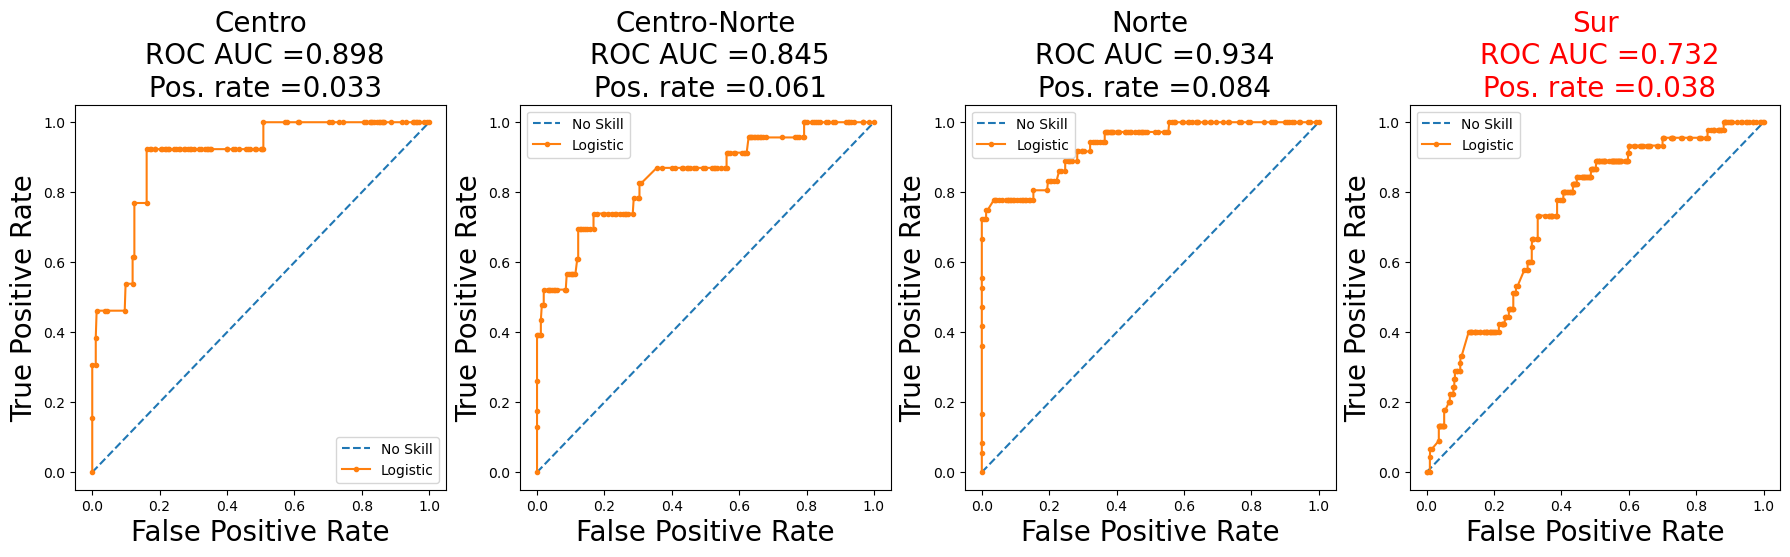

,Estado,Years,eci,eci_std_err,eci_p_value,pci,pci_std_err,pci_p_value,density,density_std_err,...,eigenvecor_centrality_p_value,degree_centrality,degree_centrality_std_err,degree_centrality_p_value,eigenvecor_centrality_rca1,eigenvecor_centrality_rca1_std_err,eigenvecor_centrality_rca1_p_value,Intercept,Intercept_std_err,Intercept_p_value
0,Centro,All,6.450410,16.556502,0.696832,-4.656276,3.501772,0.183620,147.004662,88.299025,...,0.275172,-286.961210,164.844692,0.081719,110.274871,311.335315,0.723189,-208.332940,110.257171,0.058822
1,Centro-Norte,All,3.113644,19.744975,0.874699,1.384441,0.903680,0.125521,33.861261,18.916085,...,0.090565,67.432624,33.126290,0.041788,-222.746241,192.415583,0.247015,37.540338,20.180533,0.062854
2,Norte,All,6.239903,5.074098,0.218788,0.317401,0.716223,0.657651,14.085660,20.291841,...,0.525989,45.564133,48.295633,0.345455,-477.723966,248.129149,0.054191,3.682974,19.355712,0.849091
3,Sur,All,-0.332826,15.560687,0.982935,1.100874,2.562020,0.667421,25.193691,39.794479,...,0.889863,-12.522443,68.093121,0.854091,19.160526,120.259793,0.873412,-58.970920,31.368891,0.060119


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Estados=cdata_mex_pairs['location_code'].unique()

years_pairs=cdata_mex_pairs['year_pair'].unique()

years=['All']


#features=['Density','Discovery_Factor','RCA','GPDperCAP']

features=['eci','pci','density','rca1','discovery_factor','discovery_factor_rca1',
          'GPDperCAP','GPDperCAP_rca1',
          'closeness_centrality',
          'eigenvecor_centrality',
          'degree_centrality',
          'eigenvecor_centrality_rca1']

#features=['eci','pci','density','rca1','GPDperCAP','closeness_centrality']


#features=['Nodes_Degree_Centrality','Nodes_Eigenvector_Centrality','Nodes_Closeness_Centrality','Density','Discovery_Factor','RCA','GPDperCAP']


est_yeas=[]
for ye in years:
    for estado in Estados:
        est_yeas.append([estado,ye])
        
regression_df=pd.DataFrame(est_yeas,columns=(['Estado','Years']))

for param in features:
    regression_df[param]=0
    regression_df[param+'_std_err']=0
    regression_df[param+'_p_value']=0

# Initiate figure
fig, axs = plt.subplots(1,4, figsize=(22, 5), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')

#fig.subplots_adjust(hspace = 1, wspace=1)

axs = axs.ravel()

target='M_num'
df=cdata_mex_pairs_under_trans.copy()
for i,Estado in enumerate(Estados):
    
    data_0=df.loc[(df['location_code']==Estado)][['location_code',target]+features]
    
    str_fit = target+' ~ '+features[0]
    
    for feat in features[1:]:
        str_fit=str_fit+'+'+feat
        
    x_logistic = data_0.loc[:, features].values
    
    y_logistic = data_0[target].values
    
    positive_rate=sum(y_logistic)/len(y_logistic)

    results=smf.logit(str_fit,data=data_0).fit()
    
    val_stderr=[]
    for param in results.params.keys():
        regression_df.loc[regression_df['Estado']==Estado,param]=results.params[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_std_err']=results.bse[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_p_value']=results.pvalues[param]
        
    #ROC
    
    # Genrate a Diagonal(Random Guess)
    ns_probs = [0 for _ in range(len(y_logistic))]
    # predict probabilities
    lr_probs = results.predict(data_0[features])
    # keep probabilities for the positive outcome only
    #lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_logistic, ns_probs)
    lr_auc = roc_auc_score(y_logistic, lr_probs)
    # summarize scores
   # print(Estado)
   # print('ROC AUC for Logistic Model =%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_logistic, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_logistic, lr_probs)
    # plot the roc curve for the model
    axs[i].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    axs[i].plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    axs[i].set_xlabel('False Positive Rate',size=20)
    axs[i].set_ylabel('True Positive Rate',size=20)
    # axis Title
    if lr_auc>0.75:
        tit_color='k'
    if lr_auc<0.75:
        tit_color='r'
        
    axs[i].set_title(Estado+'\n ROC AUC =%.3f' % (lr_auc)+'\n Pos. rate =%.3f' % (positive_rate),size=20,c=tit_color)
    # show the legend
    axs[i].legend()
print('Target: '+target)

print('Features:',features)
plt.show()   

regression_df

# Relaxed transition

Optimization terminated successfully.
         Current function value: 0.173501
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.260152
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.218141
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.157510
         Iterations 10
Target: M_num_relaxed_0_7
['eci', 'pci', 'density', 'rca1', 'discovery_factor', 'discovery_factor_rca1', 'GPDperCAP', 'GPDperCAP_rca1', 'closeness_centrality', 'eigenvecor_centrality', 'eigenvecor_centrality_rca1']


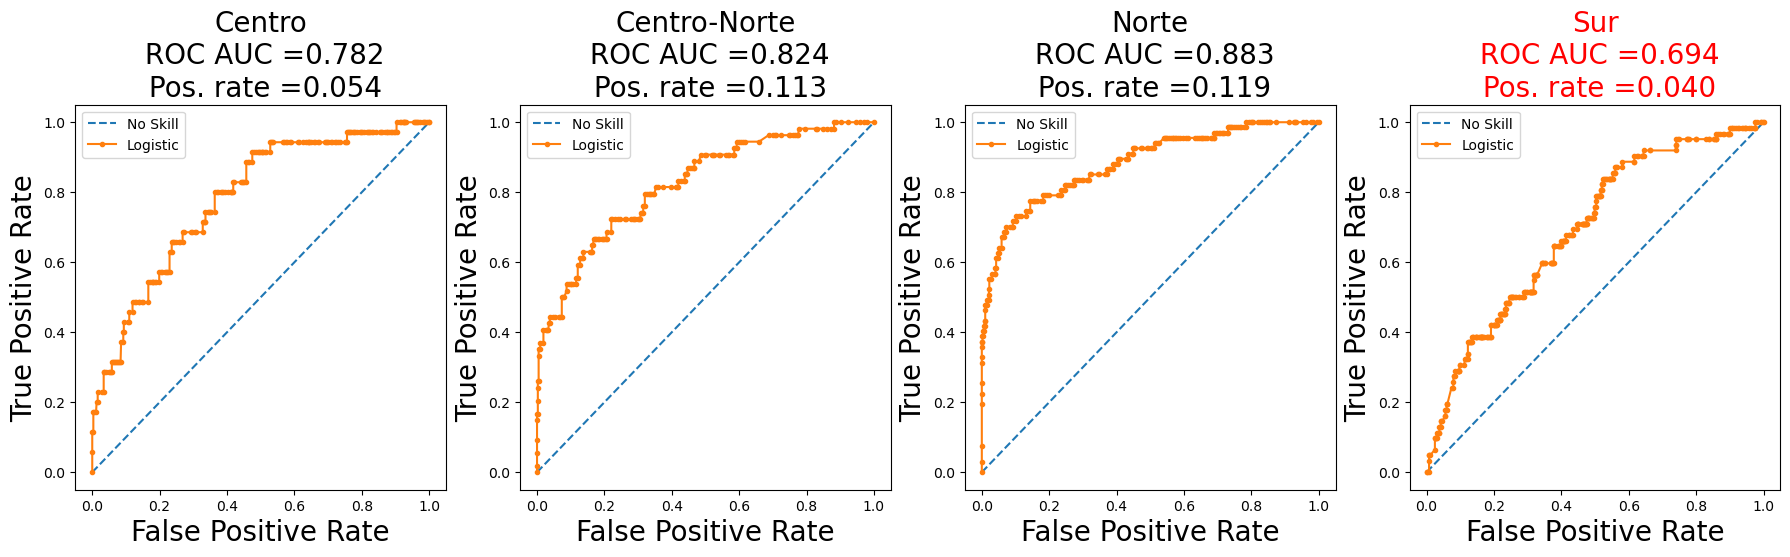

,Estado,Years,eci,eci_std_err,eci_p_value,pci,pci_std_err,pci_p_value,density,density_std_err,...,closeness_centrality_p_value,eigenvecor_centrality,eigenvecor_centrality_std_err,eigenvecor_centrality_p_value,eigenvecor_centrality_rca1,eigenvecor_centrality_rca1_std_err,eigenvecor_centrality_rca1_p_value,Intercept,Intercept_std_err,Intercept_p_value
0,Centro,All,-2.925293,6.317497,0.643331,0.152350,0.641009,0.812135,31.668967,23.058748,...,0.351984,-350.518789,334.131972,0.294158,-96.060162,126.378369,0.447195,-31.053208,21.952276,0.157192
1,Centro-Norte,All,12.422107,11.078787,0.262181,-0.253225,0.371176,0.495097,-0.292145,7.196747,...,0.543096,76.104122,116.545204,0.513756,112.634304,95.215953,0.236835,3.267678,10.864526,0.763593
2,Norte,All,-1.141289,1.905609,0.549233,0.015872,0.234653,0.946073,3.811921,6.111198,...,0.656146,55.468243,252.016470,0.825795,-234.365775,123.298839,0.057329,-7.797650,14.406546,0.588330
3,Sur,All,-14.406666,10.063169,0.152252,0.641072,0.826369,0.437885,17.100808,14.771111,...,0.657233,28.833894,184.882468,0.876066,61.778587,82.819393,0.455702,-37.178023,9.849887,0.000160


In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Estados=cdata_mex_pairs['location_code'].unique()

years_pairs=cdata_mex_pairs['year_pair'].unique()

years=['All']


#features=['Density','Discovery_Factor','RCA','GPDperCAP']

features=['eci','pci','density','rca1','discovery_factor','discovery_factor_rca1','GPDperCAP_rca1',
          'closeness_centrality','closeness_centrality_rca1',
          'eigenvecor_centrality','eigenvecor_centrality_rca1',
          'degree_centrality','degree_centrality_rca1']

features=['eci','pci','density','rca1','discovery_factor','discovery_factor_rca1',
          'GPDperCAP','GPDperCAP_rca1',
          'closeness_centrality',
          'eigenvecor_centrality',
          #'degree_centrality',
          'eigenvecor_centrality_rca1']



#features=['Nodes_Degree_Centrality','Nodes_Eigenvector_Centrality','Nodes_Closeness_Centrality','Density','Discovery_Factor','RCA','GPDperCAP']


est_yeas=[]
for ye in years:
    for estado in Estados:
        est_yeas.append([estado,ye])
        
regression_df=pd.DataFrame(est_yeas,columns=(['Estado','Years']))

for param in features:
    regression_df[param]=0
    regression_df[param+'_std_err']=0
    regression_df[param+'_p_value']=0

# Initiate figure
fig, axs = plt.subplots(1,4, figsize=(22, 5), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')

#fig.subplots_adjust(hspace = 1, wspace=1)

axs = axs.ravel()
low_range=0.7
target='M_num_relaxed_'+str(low_range).replace('.','_')
df=cdata_mex_pairs.copy().loc[cdata_mex_pairs[target].isin([0,1])]
for i,Estado in enumerate(Estados):
    
    data_0=df.loc[(df['location_code']==Estado)][['location_code',target]+features]
    
    str_fit = target+' ~ '+features[0]
    
    for feat in features[1:]:
        str_fit=str_fit+'+'+feat
        
    x_logistic = data_0.loc[:, features].values
    
    y_logistic = data_0[target].values
    
    positive_rate=sum(y_logistic)/len(y_logistic)

    results=smf.logit(str_fit,data=data_0).fit()
    
    val_stderr=[]
    for param in results.params.keys():
        regression_df.loc[regression_df['Estado']==Estado,param]=results.params[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_std_err']=results.bse[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_p_value']=results.pvalues[param]
        
    #ROC
    
    # Genrate a Diagonal(Random Guess)
    ns_probs = [0 for _ in range(len(y_logistic))]
    # predict probabilities
    lr_probs = results.predict(data_0[features])
    # keep probabilities for the positive outcome only
    #lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_logistic, ns_probs)
    lr_auc = roc_auc_score(y_logistic, lr_probs)
    # summarize scores
   # print(Estado)
   # print('ROC AUC for Logistic Model =%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_logistic, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_logistic, lr_probs)
    # plot the roc curve for the model
    axs[i].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    axs[i].plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    axs[i].set_xlabel('False Positive Rate',size=20)
    axs[i].set_ylabel('True Positive Rate',size=20)
    # axis Title
    if lr_auc>0.75:
        tit_color='k'
    if lr_auc<0.75:
        tit_color='r'
        
    axs[i].set_title(Estado+'\n ROC AUC =%.3f' % (lr_auc)+'\n Pos. rate =%.3f' % (positive_rate),size=20,c=tit_color)
    # show the legend
    axs[i].legend()
print('Target: '+target)

print(features)

plt.show()   

regression_df